# Project 2 - Charts & Analysis

## First of all, importing the key libraries needed and setting up the basic setttings for the charts

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [20]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Importing the database

In [ ]:
def cleaning_df (path):
    df = pd.read_csv(path, index_col = 0, encoding = 'unicode_escape')
    df["charname"] = df.charname.apply(lambda x: x.replace(" ", ""))
    df["birthname"] = df.birthname.apply(lambda x: x.replace(" ", ""))
    print("dataframe limpio")
    return df

In [6]:
ultra_merged_df = pd.read_csv("/Users/Marc/Desktop/Labs/Project 2/My_code/file_to_analyse.csv", index_col=0,encoding = 'unicode_escape')
ultra_merged_df

,char,charname,birthname,types,universes,superpowers,comics,series,stories,events,Super Powers,gender
0,http://www.wikidata.org/entity/Q18754954,Silk,CindyMoon,"mutate, comics character","Earth-616, Marvel Universe","superhuman agility / reflexes, superhuman dura...",56.0,17.0,56.0,1.0,superhuman,female
1,http://www.wikidata.org/entity/Q3127430,Snowbird,Narya,"demigod or quasi-deity in a work of fiction, c...",Marvel Universe,"flight, shapeshifting, superhuman strength, re...",48.0,12.0,68.0,3.0,superhuman,female
2,http://www.wikidata.org/entity/Q546340,Thunderbird,JohnProudstar,"television character, animated character, mutant",Marvel Universe,"superhuman durability, superhuman speed, super...",33.0,21.0,30.0,2.0,superhuman,male
3,http://www.wikidata.org/entity/Q1194236,Cannonball,SamuelZacheryGuthrie,"superhero film character, animated character, ...","Earth-616, Marvel Universe",thermo-chemical energy,292.0,80.0,323.0,12.0,others,male
4,http://www.wikidata.org/entity/Q2087326,Shriek,FrancesLouiseBarrison,"film character, comics character",Marvel Universe,sonic scream,7.0,3.0,8.0,1.0,others,female
...,...,...,...,...,...,...,...,...,...,...,...,...
98,http://www.wikidata.org/entity/Q49262738,UltimateAngel,WarrenWorthingtonIII,mutant,Marvel Universe,flight,6.0,2.0,6.0,0.0,flight,male
99,http://www.wikidata.org/entity/Q3316968,MisterNegative,MartinLi,"mutate, comics character","Earth-616, Marvel Universe","superhuman agility / reflexes, mind control, s...",0.0,0.0,0.0,0.0,superhuman,male
100,http://www.wikidata.org/entity/Q7880273,UltimateWolverine,JamesHowlett,mutant,Marvel Universe,"superhuman endurance, superhuman longevity, su...",3.0,2.0,3.0,0.0,superhuman,male
101,http://www.wikidata.org/entity/Q4003164,UltimateBlackCat,FeliciaHardy,"fictional human, comics character",Marvel Universe,"enhanced smell, superhuman agility / reflexes,...",3.0,2.0,4.0,1.0,superhuman,female


## Dropping a column I'm not going to need for the analysis

In [5]:
ultra_merged_df = ultra_merged_df.drop(columns=["superpowers"])
ultra_merged_df

,char,charname,birthname,types,universes,comics,series,stories,events,Super Powers,gender
0,http://www.wikidata.org/entity/Q18754954,Silk,CindyMoon,"mutate, comics character","Earth-616, Marvel Universe",56.0,17.0,56.0,1.0,superhuman,female
1,http://www.wikidata.org/entity/Q3127430,Snowbird,Narya,"demigod or quasi-deity in a work of fiction, c...",Marvel Universe,48.0,12.0,68.0,3.0,superhuman,female
2,http://www.wikidata.org/entity/Q546340,Thunderbird,JohnProudstar,"television character, animated character, mutant",Marvel Universe,33.0,21.0,30.0,2.0,superhuman,male
3,http://www.wikidata.org/entity/Q1194236,Cannonball,SamuelZacheryGuthrie,"superhero film character, animated character, ...","Earth-616, Marvel Universe",292.0,80.0,323.0,12.0,others,male
4,http://www.wikidata.org/entity/Q2087326,Shriek,FrancesLouiseBarrison,"film character, comics character",Marvel Universe,7.0,3.0,8.0,1.0,others,female
...,...,...,...,...,...,...,...,...,...,...,...
98,http://www.wikidata.org/entity/Q49262738,UltimateAngel,WarrenWorthingtonIII,mutant,Marvel Universe,6.0,2.0,6.0,0.0,flight,male
99,http://www.wikidata.org/entity/Q3316968,MisterNegative,MartinLi,"mutate, comics character","Earth-616, Marvel Universe",0.0,0.0,0.0,0.0,superhuman,male
100,http://www.wikidata.org/entity/Q7880273,UltimateWolverine,JamesHowlett,mutant,Marvel Universe,3.0,2.0,3.0,0.0,superhuman,male
101,http://www.wikidata.org/entity/Q4003164,UltimateBlackCat,FeliciaHardy,"fictional human, comics character",Marvel Universe,3.0,2.0,4.0,1.0,superhuman,female


# Project hypotheses

# Hypotheses:
1) Comics and series have roughly the same amount of projects within each of them

2) Superhuman powers represent the 70% of all the different superpowers

3) The top 5 superheroes by number of comics are all men

4) The proportion of comics, series, stories and events is similar regardless of gender

## First of all, some statistics across the dataframe

## Chart 1 - Violin plot showing Median number of Comics 

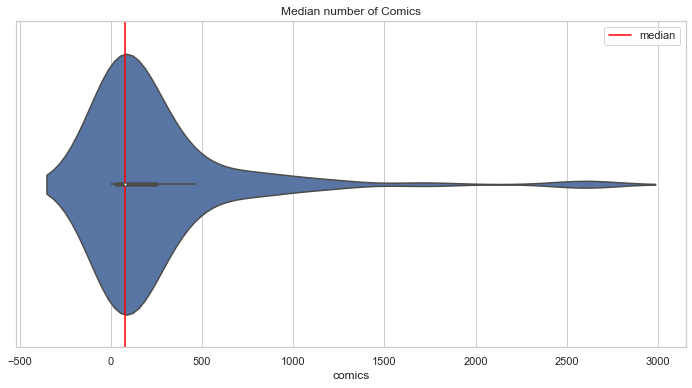

In [21]:
violin = sns.violinplot(x=ultra_merged_df.comics)
figure_1 = violin.axvline(x=ultra_merged_df.comics.median(), c="red", label="median")
plt.legend()
plt.title("Median number of Comics");
figure_1.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_1.jpg", dpi=1000)

## Chart 2 - Violin plot showing Median number of Comics by Gender

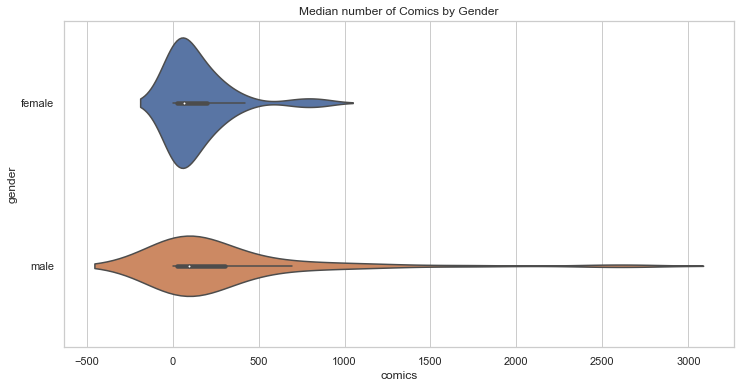

In [22]:
figure_2 = sns.violinplot(x=ultra_merged_df.comics, y=ultra_merged_df.gender);
plt.title("Median number of Comics by Gender");
figure_2.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_2.jpg", dpi=1000)

In [13]:
ultra_merged_df.to_csv()

,char,charname,birthname,types,universes,superpowers,comics,series,stories,events,Super Powers,gender
0,http://www.wikidata.org/entity/Q18754954,Silk,CindyMoon,"mutate, comics character","Earth-616, Marvel Universe","superhuman agility / reflexes, superhuman dura...",56.0,17.0,56.0,1.0,superhuman,female
1,http://www.wikidata.org/entity/Q3127430,Snowbird,Narya,"demigod or quasi-deity in a work of fiction, c...",Marvel Universe,"flight, shapeshifting, superhuman strength, re...",48.0,12.0,68.0,3.0,superhuman,female
2,http://www.wikidata.org/entity/Q546340,Thunderbird,JohnProudstar,"television character, animated character, mutant",Marvel Universe,"superhuman durability, superhuman speed, super...",33.0,21.0,30.0,2.0,superhuman,male
3,http://www.wikidata.org/entity/Q1194236,Cannonball,SamuelZacheryGuthrie,"superhero film character, animated character, ...","Earth-616, Marvel Universe",thermo-chemical energy,292.0,80.0,323.0,12.0,others,male
4,http://www.wikidata.org/entity/Q2087326,Shriek,FrancesLouiseBarrison,"film character, comics character",Marvel Universe,sonic scream,7.0,3.0,8.0,1.0,others,female
...,...,...,...,...,...,...,...,...,...,...,...,...
98,http://www.wikidata.org/entity/Q49262738,UltimateAngel,WarrenWorthingtonIII,mutant,Marvel Universe,flight,6.0,2.0,6.0,0.0,flight,male
99,http://www.wikidata.org/entity/Q3316968,MisterNegative,MartinLi,"mutate, comics character","Earth-616, Marvel Universe","superhuman agility / reflexes, mind control, s...",0.0,0.0,0.0,0.0,superhuman,male
100,http://www.wikidata.org/entity/Q7880273,UltimateWolverine,JamesHowlett,mutant,Marvel Universe,"superhuman endurance, superhuman longevity, su...",3.0,2.0,3.0,0.0,superhuman,male
101,http://www.wikidata.org/entity/Q4003164,UltimateBlackCat,FeliciaHardy,"fictional human, comics character",Marvel Universe,"enhanced smell, superhuman agility / reflexes,...",3.0,2.0,4.0,1.0,superhuman,female


## Chart 3 - Violin plot showing Median number of Comics by main Super Power

In [10]:
def violin (df, col, title, n):
    path = f"../images/violin_{n}.jpg"
    fig = sns.violinplot(x=ultra_merged_df.comics, y=ultra_merged_df[col]);
    plt.title(title)
    fig.figure.savefig(path, dpi=1000)

In [87]:
# I will define a function for all the charts if needed

In [11]:
dict_1 = {
    "comics":"Median number of Comics"
    "gender": "Median number of Comics by Gender"
    "Super Powers":"Median number of Comics by main Super Power"
    
}

In [ ]:
dict_2 = {
    "series":"Median number of Series"
    "gender": "Median number of Series by Gender"
    "Super Powers":"Median number of Series by main Super Power"
    
}

In [ ]:
dict_3 = {
    "stories":"Median number of Stories"
    "gender": "Median number of Stories by Gender"
    "Super Powers":"Median number of Stories by main Super Power"
    
}

In [ ]:
dict_4 = {
    "events":"Median number of Events"
    "gender": "Median number of Events by Gender"
    "Super Powers":"Median number of Events by main Super Power"
    
}

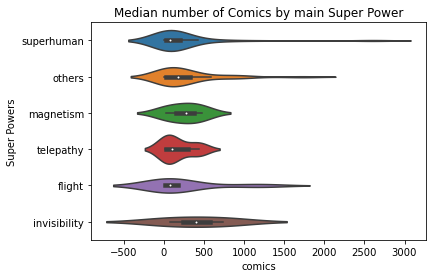

In [12]:
n = 0
for key, value in dict_.items():
    n += 1
    violin(key, value, n)

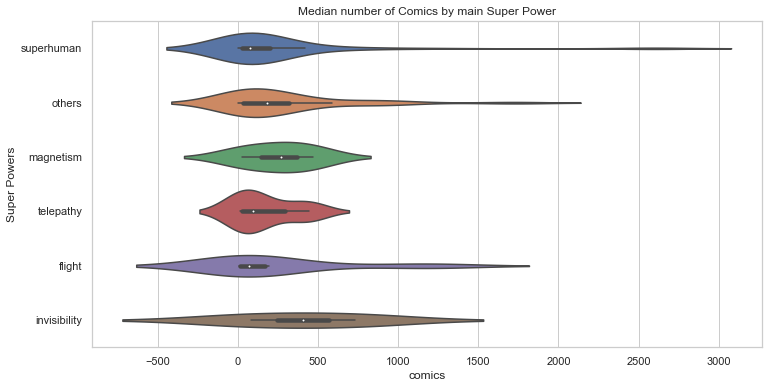

In [23]:
figure_3 = sns.violinplot(x=ultra_merged_df.comics, y=ultra_merged_df["Super Powers"]);
plt.title("Median number of Comics by main Super Power");
figure_3.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_3.jpg", dpi=1000)

## Chart 4 - Box plot showing Median number of Comics & outliers

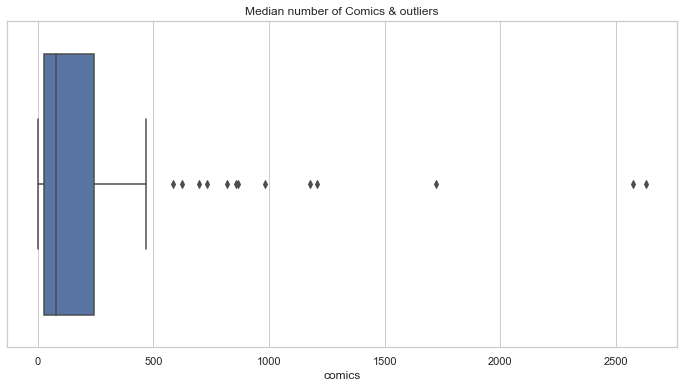

In [31]:
figure_4 = sns.boxplot(x="comics", data=ultra_merged_df);
plt.title("Median number of Comics & outliers");
figure_4.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_4.jpg", dpi=1000)

## Chart 5 - Violin plot showing Median number of Series

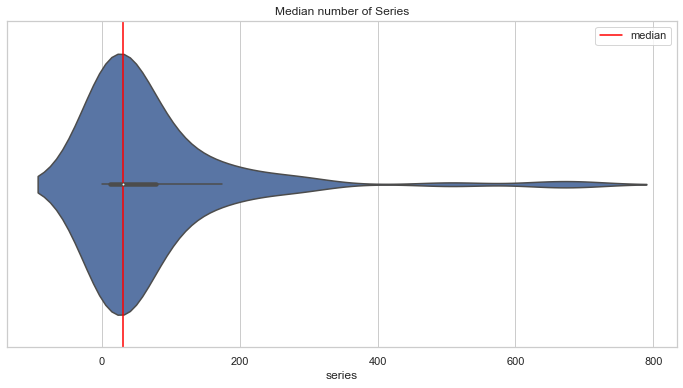

In [27]:
violin = sns.violinplot(x=ultra_merged_df.series)
figure_5 = violin.axvline(x=ultra_merged_df.series.median(), c="red", label="median")
plt.legend()
plt.title("Median number of Series");
figure_5.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_5.jpg", dpi=1000)

## Chart 6 - Violin plot showing Median number of Series by Gender

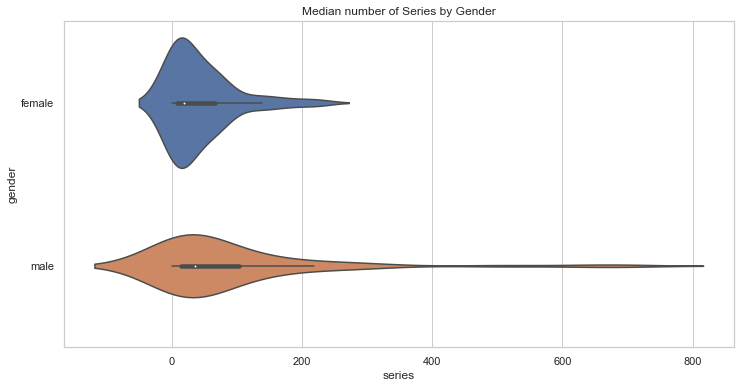

In [28]:
figure_6 = sns.violinplot(x=ultra_merged_df.series, y=ultra_merged_df.gender);
plt.title("Median number of Series by Gender");
figure_6.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_6.jpg", dpi=1000)

## Chart 7 - Violin plot showing Median number of Series by Super Power

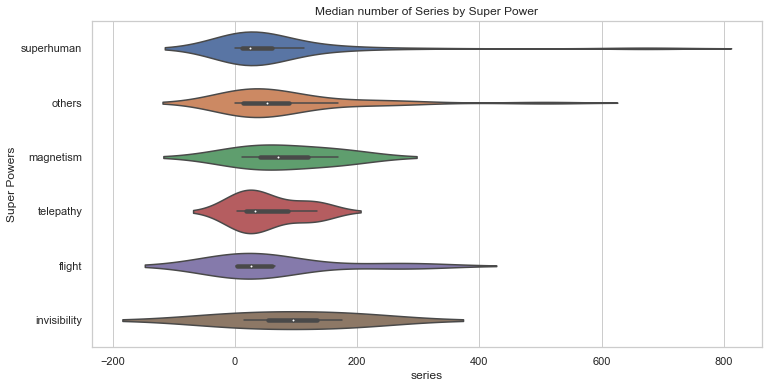

In [29]:
figure_7 = sns.violinplot(x=ultra_merged_df.series, y=ultra_merged_df["Super Powers"]);
plt.title("Median number of Series by Super Power");
figure_7.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_7.jpg", dpi=1000)

## Chart 8 - Box plot showing Median number of Series & outliers

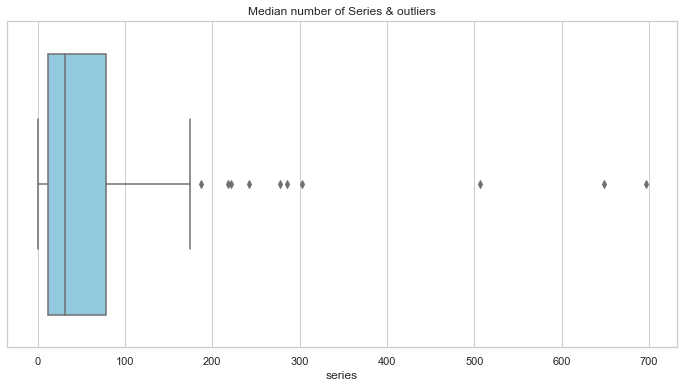

In [32]:
figure_8 = sns.boxplot(x="series", data=ultra_merged_df,color="skyblue")
plt.title("Median number of Series & outliers");
figure_8.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_8.jpg", dpi=1000)

## Chart 9 - Violin plot showing Median number of Stories

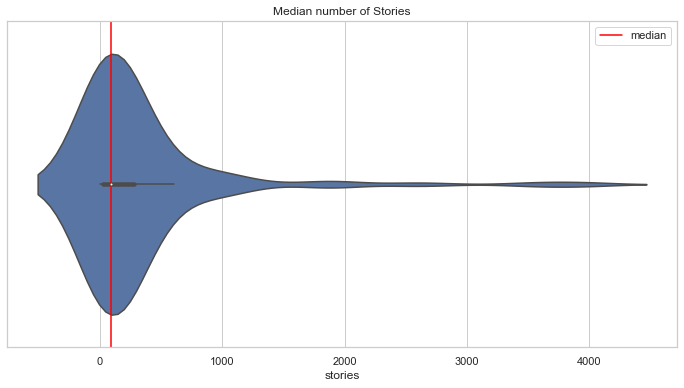

In [34]:
violin = sns.violinplot(x=ultra_merged_df.stories)
figure_9 = violin.axvline(x=ultra_merged_df.stories.median(), c="red", label="median")
plt.legend()
plt.title("Median number of Stories");
figure_9.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_9.jpg", dpi=1000)

## Chart 10 - Violin plot showing Median number of Stories by Gender

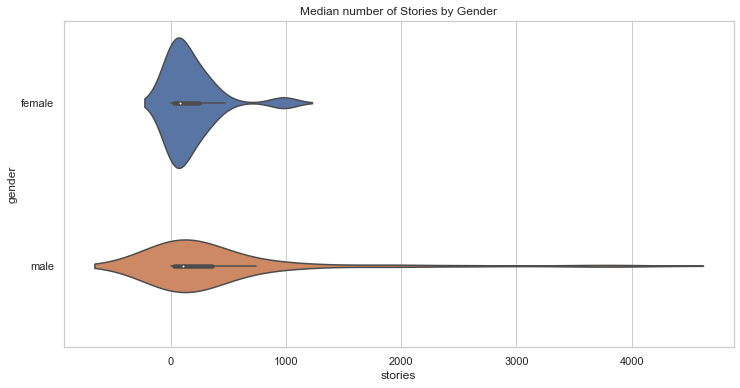

In [35]:
figure_10 = sns.violinplot(x=ultra_merged_df.stories, y=ultra_merged_df.gender);
plt.title("Median number of Stories by Gender");
figure_10.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_10.jpg", dpi=1000)

## Chart 11 - Violin plot showing Median number of Stories by Super Power

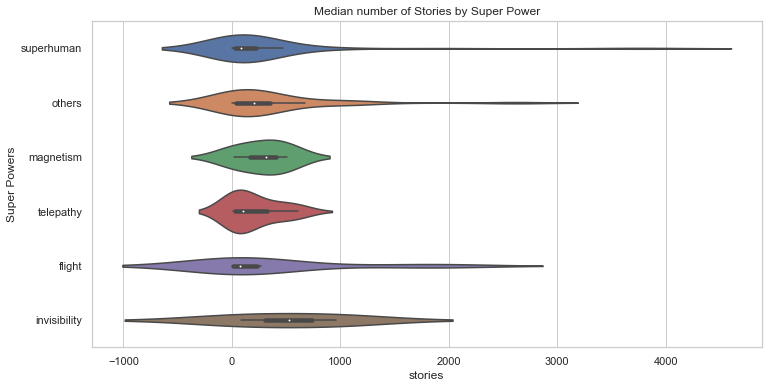

In [36]:
figure_11 = sns.violinplot(x=ultra_merged_df.stories, y=ultra_merged_df["Super Powers"]);
plt.title("Median number of Stories by Super Power");
figure_11.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_11.jpg", dpi=1000)

## Chart 12 - Box plot showing Median number of Stories & outliers

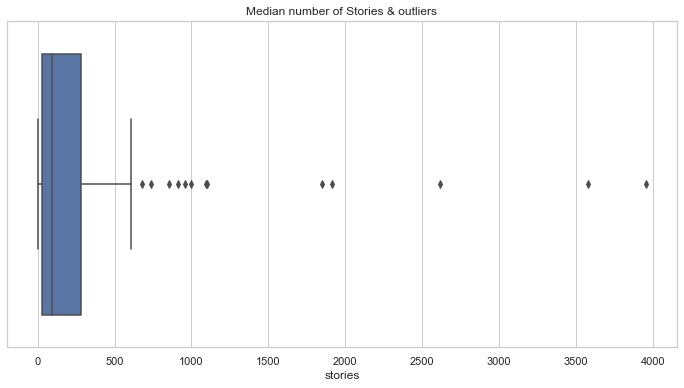

In [39]:
figure_12 = sns.boxplot(x="stories", data=ultra_merged_df);
plt.title("Median number of Stories & outliers");
figure_12.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_12.jpg", dpi=1000)

## Chart 13 - Violin plot showing Median number of Events

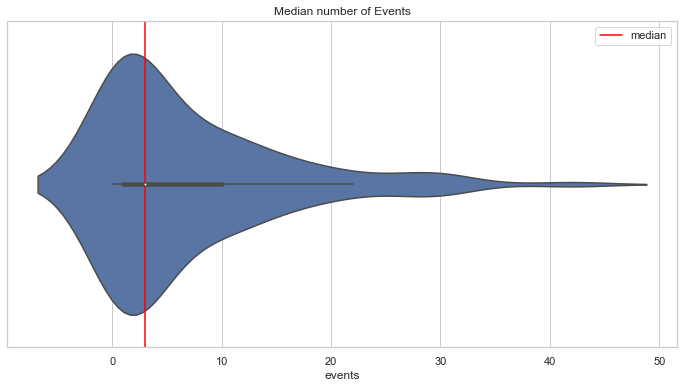

In [40]:
violin = sns.violinplot(x=ultra_merged_df.events)
figure_13 = violin.axvline(x=ultra_merged_df.events.median(), c="red", label="median")
plt.legend()
plt.title("Median number of Events");
figure_13.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_13.jpg", dpi=1000)

## Chart 14 - Violin plot showing Median number of Events by Gender

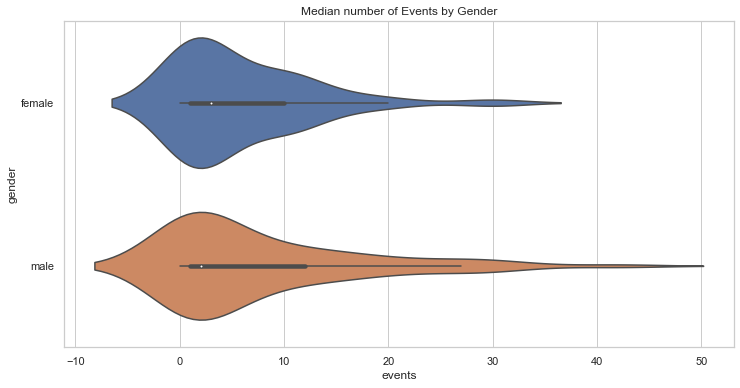

In [41]:
figure_14 = sns.violinplot(x=ultra_merged_df.events, y=ultra_merged_df.gender);
plt.title("Median number of Events by Gender");
figure_14.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_14.jpg", dpi=1000)

## Chart 15 - Violin plot showing Median number of Events by Super Power

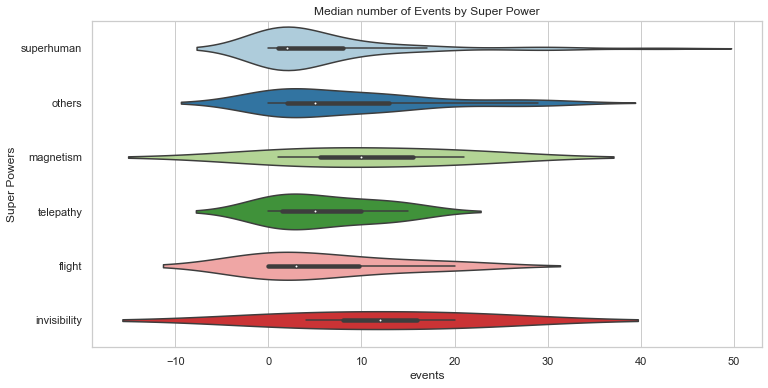

In [42]:
figure_15 = sns.violinplot(x=ultra_merged_df.events, y=ultra_merged_df["Super Powers"], palette="Paired");
plt.title("Median number of Events by Super Power");
figure_15.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_15.jpg", dpi=1000)

## Chart 16 - Box plot showing Median number of Events & outliers

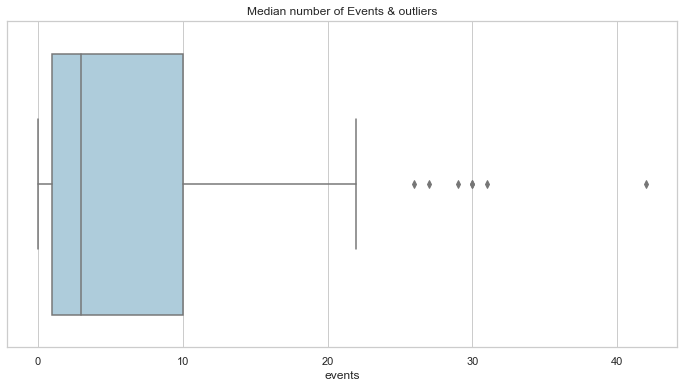

In [43]:
figure_16 = sns.boxplot(x="events", data=ultra_merged_df,palette="Paired")
plt.title("Median number of Events & outliers");
figure_16.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_16.jpg", dpi=1000)

## Chart 17 - Number of superheroes by Super Power

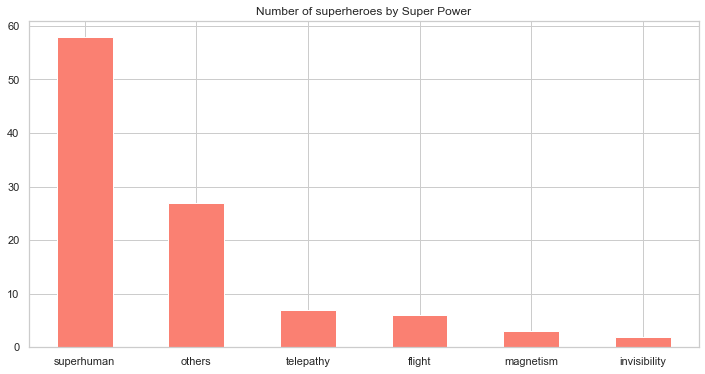

In [45]:
figure_17 = ultra_merged_df["Super Powers"].value_counts().plot(kind="bar", color="salmon", title="Number of superheroes by Super Power")
plt.title("Number of superheroes by Super Power");
plt.xticks(rotation=0);
figure_17.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_17.jpg", dpi=1000)

## Chart 18 - Number of superheroes by Gender

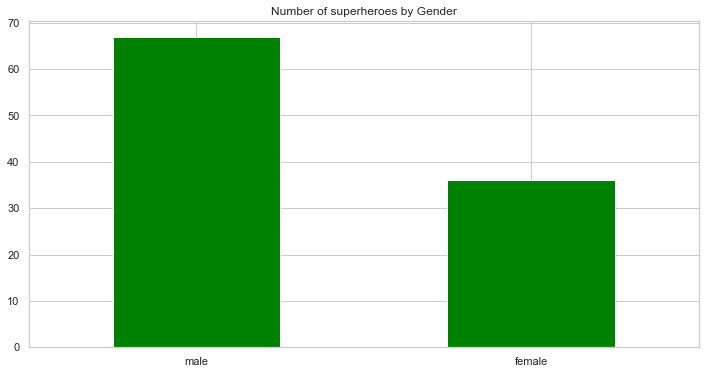

In [46]:
figure_18 = ultra_merged_df["gender"].value_counts().plot(kind="bar", color="green", title="Number of superheroes by gender")
plt.title("Number of superheroes by Gender");
plt.xticks(rotation=0);
figure_18.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_18.jpg", dpi=1000)

## Chart 19 - Number of comics by Super Power & outliers

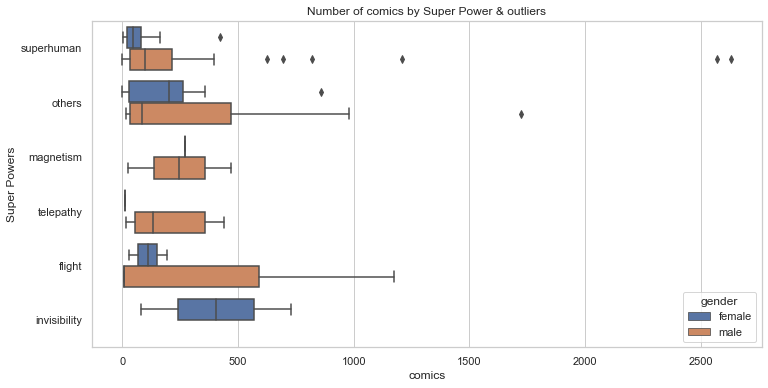

In [47]:
figure_19 = sns.boxplot(data=ultra_merged_df, x="comics", y="Super Powers", hue="gender")
plt.title("Number of comics by Super Power & outliers");
figure_19.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_19.jpg", dpi=1000)

## Chart 20 - Number of series by Super Power & outliers

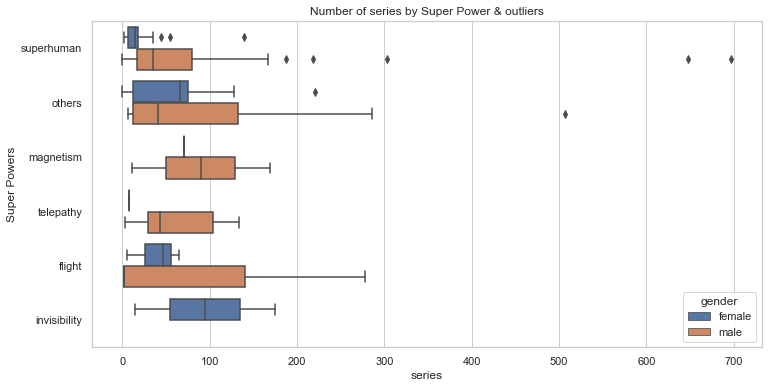

In [48]:
figure_20 = sns.boxplot(data=ultra_merged_df, x="series", y="Super Powers", hue="gender")
plt.title("Number of series by Super Power & outliers");
figure_20.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_20.jpg", dpi=1000)

## Checking the Median for Comics is the same than in the actual chart

In [118]:
ultra_merged_df["comics"].median()

80.0

## Running different "Groupby" so we can have an aggregated view

In [50]:
first_groupby = ultra_merged_df.groupby("gender").agg({"comics": "mean","series": "mean", "stories": "mean", "events": "mean" })
first_groupby

,comics,series,stories,events
gender,,,,
female,145.416667,42.972222,172.861111,5.944444
male,305.000000,89.268657,398.641791,7.641791


## Chart 21 - Display of different formats by Gender

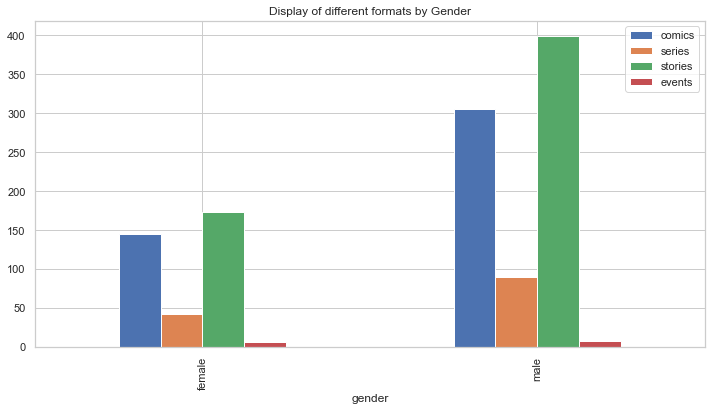

In [51]:
figure_21 = first_groupby.plot(kind="bar")
plt.title("Display of different formats by Gender");
figure_21.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_21.jpg", dpi=1000)

In [52]:
third_groupby = ultra_merged_df.groupby("Super Powers").agg({"comics": "mean","series": "mean", "stories": "mean", "events": "mean" })
third_groupby

,comics,series,stories,events
Super Powers,,,,
flight,253.333333,66.333333,381.166667,6.166667
invisibility,405.000000,94.500000,523.500000,12.000000
magnetism,254.333333,83.333333,280.333333,10.666667
others,288.000000,85.444444,356.407407,8.814815
superhuman,234.620690,69.017241,305.241379,6.068966
telepathy,170.428571,54.428571,204.285714,6.142857


## Chart 22 - Average of different formats by Super Power

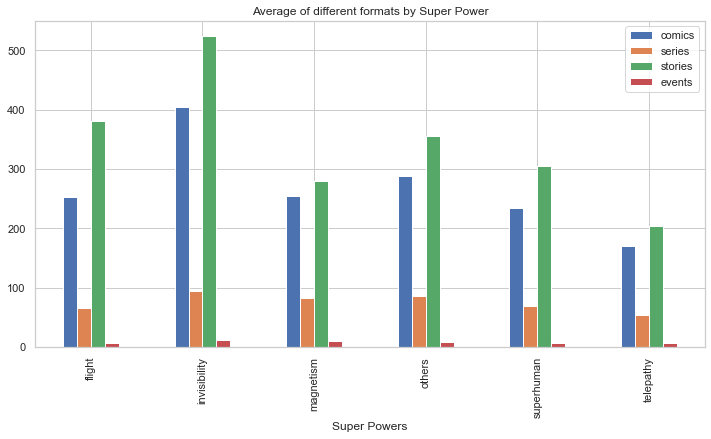

In [53]:
figure_22 = third_groupby.plot(kind="bar")
plt.title("Average of different formats by Super Power");
figure_22.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_22.jpg", dpi=1000)

In [54]:
fourth_groupby = ultra_merged_df.groupby("Super Powers").agg({"comics": "sum","series": "sum", "stories": "sum", "events": "sum" })
fourth_groupby

,comics,series,stories,events
Super Powers,,,,
flight,1520.0,398.0,2287.0,37.0
invisibility,810.0,189.0,1047.0,24.0
magnetism,763.0,250.0,841.0,32.0
others,7776.0,2307.0,9623.0,238.0
superhuman,13608.0,4003.0,17704.0,352.0
telepathy,1193.0,381.0,1430.0,43.0


## Chart 23 - Total by format by Super Power

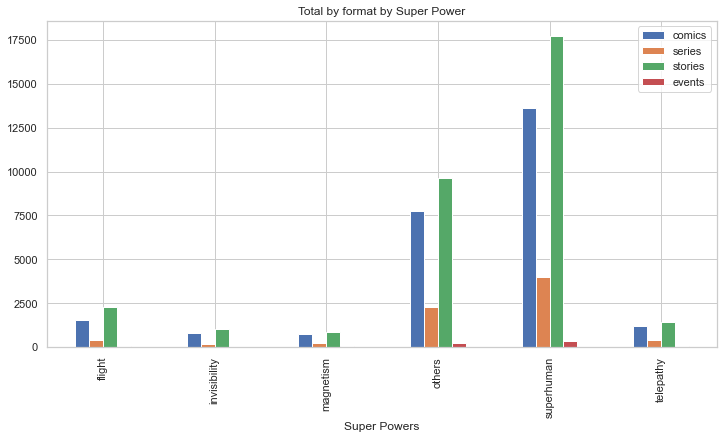

In [55]:
figure_23 = fourth_groupby.plot(kind="bar")
plt.title("Total by format by Super Power");
figure_23.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_23.jpg", dpi=1000)

# Hypothesis 1: Comics and series have roughly the same amount of projects within each of them

## Chart 24 - Total number of Comics & Series

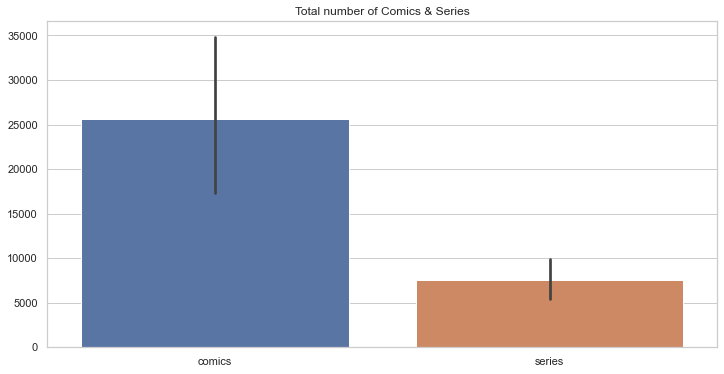

In [56]:
figure_24 = sns.barplot(ultra_merged_df[["comics", "series"]], estimator="sum")
plt.title("Total number of Comics & Series");
figure_24.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_24.jpg", dpi=1000)

## Extra info: looking at the top 10 characters by number of comics released

In [58]:
sorted_by_comics = ultra_merged_df.sort_values(by=['comics'],ascending=False)
sorted_by_comics

,char,charname,birthname,types,universes,superpowers,comics,series,stories,events,Super Powers,gender
53,http://www.wikidata.org/entity/Q180704,IronMan,AnthonyEdwardCarbonellStark,"film character, fictional human, comics character","Earth-616, Marvel Universe","flight, armor, superhuman strength",2631.0,648.0,3958.0,31.0,superhuman,male
46,http://www.wikidata.org/entity/Q186422,Wolverine,JamesHowlett,"anime character, superhero film character, ani...","Earth-616, Marvel Universe","superhuman longevity, superhuman senses, super...",2572.0,697.0,3580.0,42.0,superhuman,male
40,http://www.wikidata.org/entity/Q188760,Hulk,BruceBanner,"gamma mutate, superhero film character, mutate...","Earth-616, Marvel Universe",healing factor,1723.0,507.0,2613.0,26.0,others,male
15,http://www.wikidata.org/entity/Q327553,Daredevil,MatthewMichaelMurdock,"superhero film character, television character...","Earth-616, Marvel Universe",superhuman senses,1207.0,303.0,1912.0,17.0,superhuman,male
58,http://www.wikidata.org/entity/Q584585,HumanTorch,JonathanLowellSpencerStorm,"film character, animated character, fictional ...","Earth-616, Marvel Universe","flight, pyrokinesis",1176.0,278.0,1850.0,20.0,flight,male
...,...,...,...,...,...,...,...,...,...,...,...,...
101,http://www.wikidata.org/entity/Q4003164,UltimateBlackCat,FeliciaHardy,"fictional human, comics character",Marvel Universe,"enhanced smell, superhuman agility / reflexes,...",3.0,2.0,4.0,1.0,superhuman,female
91,http://www.wikidata.org/entity/Q2651308,Magik,ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ»ÃÂÃÂÃÂÃ...,"superhero film character, mutant","Earth-616, Marvel Universe","teleportation, magic in fiction",2.0,2.0,2.0,2.0,others,female
63,http://www.wikidata.org/entity/Q2917078,MacGargan,MacDonaldGargan,"animated character, mutate","Earth-616, Marvel Universe","superhuman agility / reflexes, superhuman dura...",0.0,0.0,0.0,0.0,superhuman,male
50,http://www.wikidata.org/entity/Q3613591,AmandaSefton,JimaineSzardos,"witch in a work of fiction, animated character...",Marvel Universe,"shapeshifting, teleportation",0.0,0.0,0.0,0.0,others,female


In [59]:
top_ten_comics = sorted_by_comics["charname"][:10]
top_ten_comics

53           IronMan
46         Wolverine
40              Hulk
15         Daredevil
58        HumanTorch
54           Cyclops
81          Deadpool
73             Storm
94             Beast
59    InvisibleWoman
Name: charname, dtype: object

## Chart 25 - Top 10 characters by number of Comics released

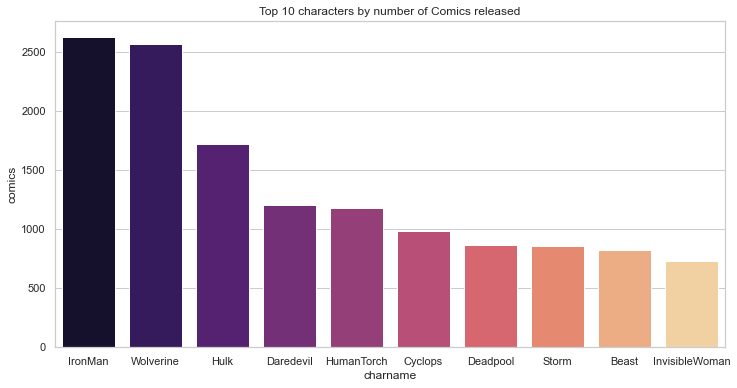

In [60]:
figure_25 = sns.barplot(x=sorted_by_comics["charname"], y=sorted_by_comics["comics"], palette="magma", estimator=sum,order=sorted_by_comics["charname"].iloc[:10])
plt.title("Top 10 characters by number of Comics released");
figure_25.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_25.jpg", dpi=1000)

# Hypothesis 2: Superhuman powers represent the 70% of all the different superpowers

In [61]:
powers = ultra_merged_df["Super Powers"].value_counts()
powers

superhuman      58
others          27
telepathy        7
flight           6
magnetism        3
invisibility     2
Name: Super Powers, dtype: int64

## Chart 26 - Distribution by Super Power

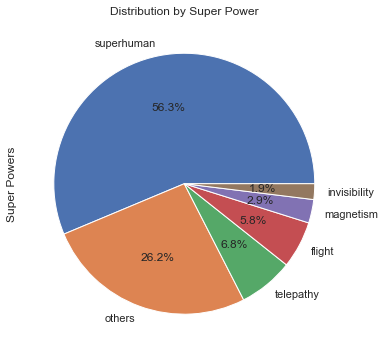

In [64]:
figure_26 = powers.plot.pie(autopct="%.1f%%")
plt.title("Distribution by Super Power");
figure_26.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_26.jpg", dpi=1000)

# Hypothesis 3: The top 5 superheroes by number of comics are all men

In [68]:
sorted_by_comics = ultra_merged_df.sort_values(by=['comics'],ascending=False)
sorted_by_comics

,char,charname,birthname,types,universes,superpowers,comics,series,stories,events,Super Powers,gender
53,http://www.wikidata.org/entity/Q180704,IronMan,AnthonyEdwardCarbonellStark,"film character, fictional human, comics character","Earth-616, Marvel Universe","flight, armor, superhuman strength",2631.0,648.0,3958.0,31.0,superhuman,male
46,http://www.wikidata.org/entity/Q186422,Wolverine,JamesHowlett,"anime character, superhero film character, ani...","Earth-616, Marvel Universe","superhuman longevity, superhuman senses, super...",2572.0,697.0,3580.0,42.0,superhuman,male
40,http://www.wikidata.org/entity/Q188760,Hulk,BruceBanner,"gamma mutate, superhero film character, mutate...","Earth-616, Marvel Universe",healing factor,1723.0,507.0,2613.0,26.0,others,male
15,http://www.wikidata.org/entity/Q327553,Daredevil,MatthewMichaelMurdock,"superhero film character, television character...","Earth-616, Marvel Universe",superhuman senses,1207.0,303.0,1912.0,17.0,superhuman,male
58,http://www.wikidata.org/entity/Q584585,HumanTorch,JonathanLowellSpencerStorm,"film character, animated character, fictional ...","Earth-616, Marvel Universe","flight, pyrokinesis",1176.0,278.0,1850.0,20.0,flight,male
...,...,...,...,...,...,...,...,...,...,...,...,...
101,http://www.wikidata.org/entity/Q4003164,UltimateBlackCat,FeliciaHardy,"fictional human, comics character",Marvel Universe,"enhanced smell, superhuman agility / reflexes,...",3.0,2.0,4.0,1.0,superhuman,female
91,http://www.wikidata.org/entity/Q2651308,Magik,ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ»ÃÂÃÂÃÂÃ...,"superhero film character, mutant","Earth-616, Marvel Universe","teleportation, magic in fiction",2.0,2.0,2.0,2.0,others,female
63,http://www.wikidata.org/entity/Q2917078,MacGargan,MacDonaldGargan,"animated character, mutate","Earth-616, Marvel Universe","superhuman agility / reflexes, superhuman dura...",0.0,0.0,0.0,0.0,superhuman,male
50,http://www.wikidata.org/entity/Q3613591,AmandaSefton,JimaineSzardos,"witch in a work of fiction, animated character...",Marvel Universe,"shapeshifting, teleportation",0.0,0.0,0.0,0.0,others,female


## Chart 29 - Top 5 superheroes by amount of comics

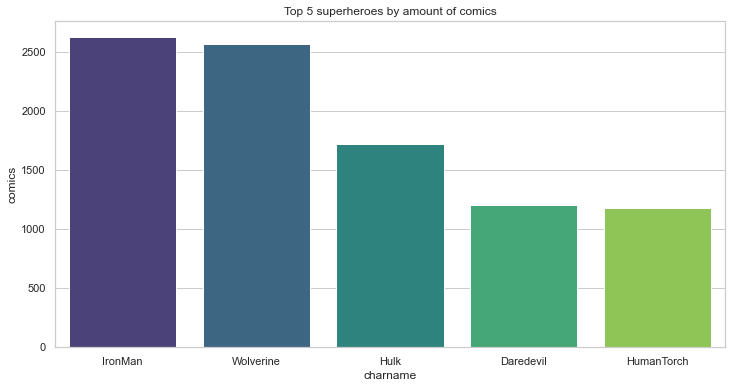

In [69]:
figure_29 = sns.barplot(x=sorted_by_comics["charname"], y=sorted_by_comics["comics"], palette="viridis", estimator=sum,order=sorted_by_comics["charname"].iloc[:5])
plt.title("Top 5 superheroes by amount of comics");
figure_29.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_29.jpg", dpi=1000)

## Let's check if it is the same for the top 15

In [70]:
sorted_by_comics.head(15)

,char,charname,birthname,types,universes,superpowers,comics,series,stories,events,Super Powers,gender
53,http://www.wikidata.org/entity/Q180704,IronMan,AnthonyEdwardCarbonellStark,"film character, fictional human, comics character","Earth-616, Marvel Universe","flight, armor, superhuman strength",2631.0,648.0,3958.0,31.0,superhuman,male
46,http://www.wikidata.org/entity/Q186422,Wolverine,JamesHowlett,"anime character, superhero film character, ani...","Earth-616, Marvel Universe","superhuman longevity, superhuman senses, super...",2572.0,697.0,3580.0,42.0,superhuman,male
40,http://www.wikidata.org/entity/Q188760,Hulk,BruceBanner,"gamma mutate, superhero film character, mutate...","Earth-616, Marvel Universe",healing factor,1723.0,507.0,2613.0,26.0,others,male
15,http://www.wikidata.org/entity/Q327553,Daredevil,MatthewMichaelMurdock,"superhero film character, television character...","Earth-616, Marvel Universe",superhuman senses,1207.0,303.0,1912.0,17.0,superhuman,male
58,http://www.wikidata.org/entity/Q584585,HumanTorch,JonathanLowellSpencerStorm,"film character, animated character, fictional ...","Earth-616, Marvel Universe","flight, pyrokinesis",1176.0,278.0,1850.0,20.0,flight,male
54,http://www.wikidata.org/entity/Q857921,Cyclops,ScottSummers,"anime character, superhero film character, ani...","Earth-616, Marvel Universe",optic blasts,981.0,286.0,1098.0,29.0,others,male
81,http://www.wikidata.org/entity/Q1631090,Deadpool,WadeWinstonWilson,"fictional soldier, superhero film character, a...",Marvel Universe,healing factor,867.0,242.0,1095.0,15.0,others,male
73,http://www.wikidata.org/entity/Q632212,Storm,OroroMunroe,"anime character, superhero film character, ani...","Earth-616, Marvel Universe",weather manipulation,859.0,221.0,998.0,30.0,others,female
94,http://www.wikidata.org/entity/Q302186,Beast,HenryPhilipMcCoy,"anime character, superhero film character, ani...","Earth-616, Marvel Universe","superhuman senses, superhuman agility / reflex...",820.0,218.0,913.0,30.0,superhuman,male
59,http://www.wikidata.org/entity/Q510450,InvisibleWoman,SusanStorm,"film character, animated character, mutate","Earth-616, Marvel Universe","invisibility, force field",730.0,175.0,960.0,20.0,invisibility,female


## Chart 30 - Top 15 superheroes by amount of comics (Storm is first woman)

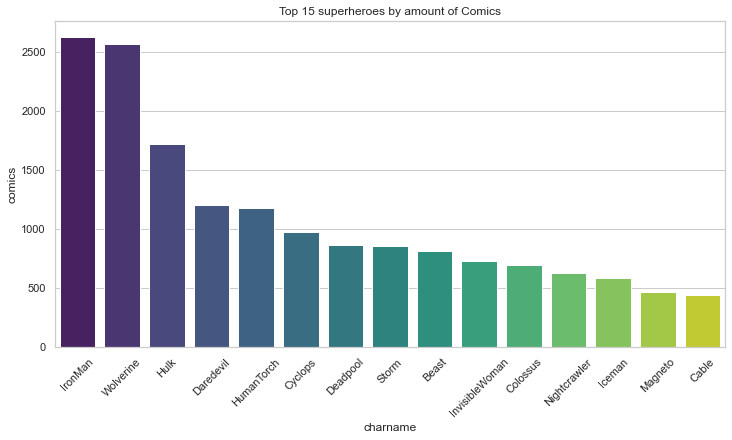

In [72]:
figure_30 = sns.barplot(x=sorted_by_comics["charname"], y=sorted_by_comics["comics"], palette="viridis", estimator=sum,order=sorted_by_comics["charname"].iloc[:15])
figure_30.set_xticklabels(figure_30.get_xticklabels(), rotation=45)
plt.title("Top 15 superheroes by amount of Comics");
figure_30.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_30.jpg", dpi=1000)

# Hypothesis 4: The proportion of comics, series, stories and events is proportionate by gender

## Chart 31 - Total by format by Gender

In [82]:
first_groupby = ultra_merged_df.groupby("gender").agg({"comics": "mean","series": "mean", "stories": "mean", "events": "mean" })
first_groupby

,comics,series,stories,events
gender,,,,
female,145.416667,42.972222,172.861111,5.944444
male,305.000000,89.268657,398.641791,7.641791


## Chart 27 - Average format by Gender

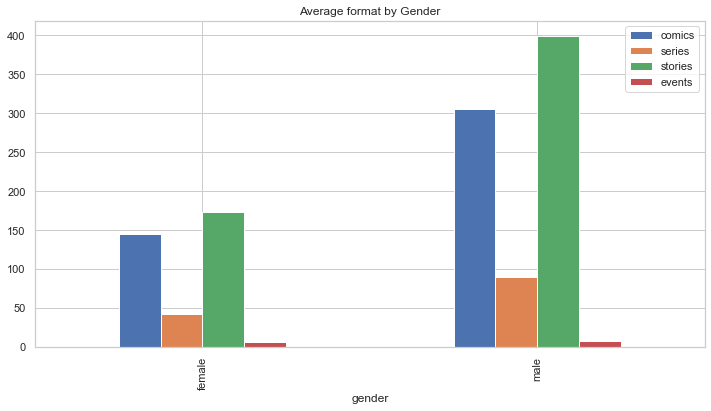

In [83]:
figure_27 = first_groupby.plot(kind="bar")
plt.title("Average format by Gender");
figure_27.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_27.jpg", dpi=1000)

In [85]:
second_groupby = ultra_merged_df.groupby("gender").agg({"comics": "sum","series": "sum", "stories": "sum", "events": "sum" })
second_groupby

,comics,series,stories,events
gender,,,,
female,5235.0,1547.0,6223.0,214.0
male,20435.0,5981.0,26709.0,512.0


## Chart 28 - Total format by Gender

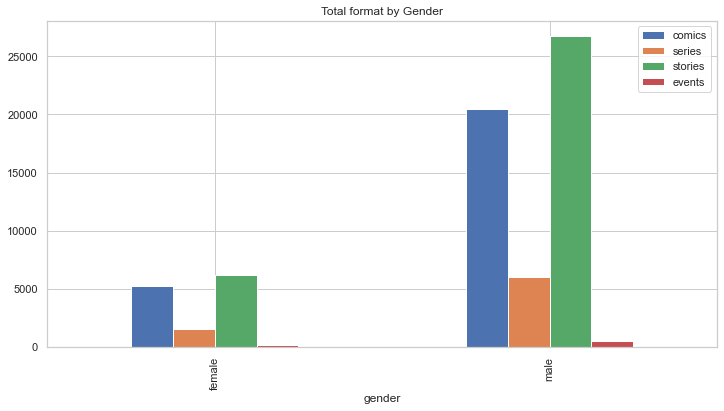

In [86]:
figure_28 = second_groupby.plot(kind="bar")
plt.title("Total format by Gender");
figure_28.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_28.jpg", dpi=1000)

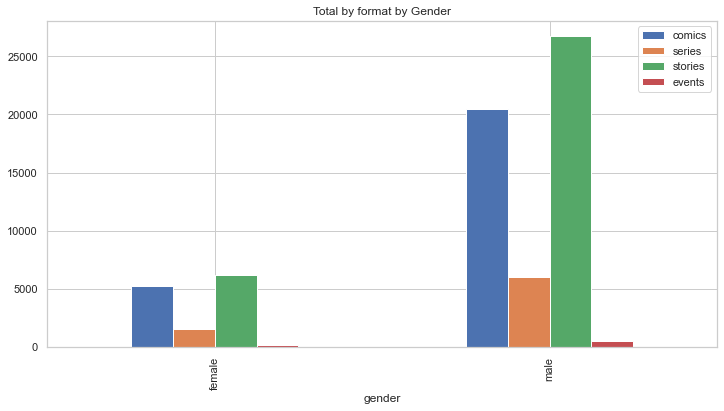

In [73]:
figure_31 = second_groupby.plot(kind="bar")
plt.title("Total by format by Gender");
figure_31.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_31.jpg", dpi=1000)

## Let's check the relationship between comics and gender

## Chart 32 - Relationship between Number of Comics & Gender

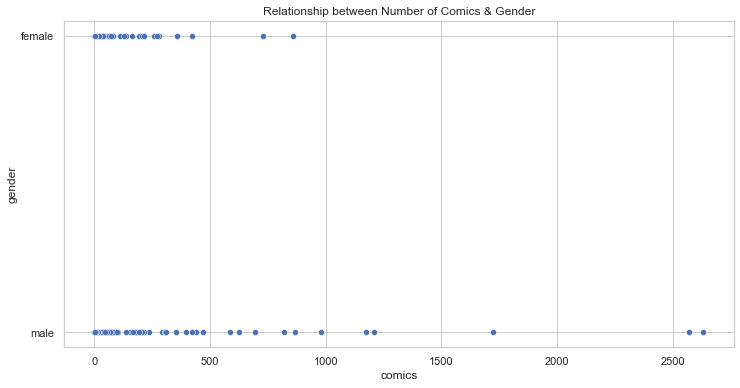

In [74]:
figure_32 = sns.scatterplot(x="comics", y="gender", data=ultra_merged_df);
plt.title("Relationship between Number of Comics & Gender");
figure_32.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_32.jpg", dpi=1000)

## Okay, this graph is not saying us much apart from men superheroes having a bigger number of comics released...What about if we add a new variable to the mix? 

## Chart 33 - Relationship between Number of Comics & series by Gender

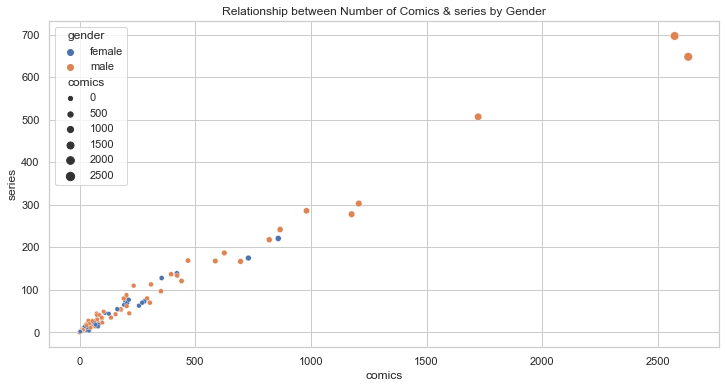

In [75]:
figure_33 = sns.scatterplot(x="comics", y="series", hue="gender",data=ultra_merged_df, size="comics");
plt.title("Relationship between Number of Comics & series by Gender");
figure_33.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_33.jpg", dpi=1000)

## Now we can see the bigger the number of comics & series are, the more men superheroes dominate the mix

## Chart 34 - Relationship between Number of Stories & Events by Gender

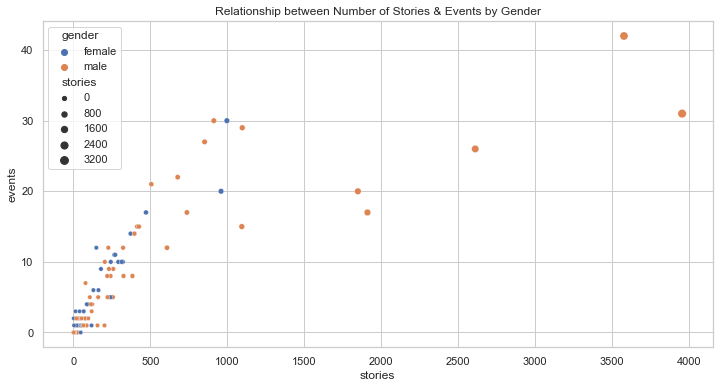

In [76]:
figure_34 = sns.scatterplot(x="stories", y="events", hue="gender",data=ultra_merged_df, size="stories");
plt.title("Relationship between Number of Stories & Events by Gender");
figure_34.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_34.jpg", dpi=1000)

## Similar approach if we look at the relationship between the number of Events & Series by Gender

## Let's also create a new column organising the number of comics released in batches so it is easier to understand

In [77]:
range_comics = ultra_merged_df.copy()

In [78]:
range_comics = range_comics.astype({'comics':'int'})

In [79]:
# Create a new column with age ranges
range_comics_two = range_comics.copy()
conditions = [
    (range_comics["comics"] <= 500),
    (range_comics["comics"] > 500) & (range_comics["comics"] <= 1000),
    (range_comics["comics"] > 1000) & (range_comics["comics"] <= 1500),
    (range_comics["comics"] > 1500) & (range_comics["comics"] <= 2000),
    (range_comics["comics"] > 2000) & (range_comics["comics"] <= 2500),
    (range_comics["comics"] > 2500) & (range_comics["comics"] <= 3000),
    (range_comics["comics"] > 3000) & (range_comics["comics"] <= 3500),
    (range_comics["comics"] > 3500) & (range_comics["comics"] <= 4000),
    (range_comics["comics"] > 4000) & (range_comics["comics"] <= 4500),
    ]

# create a list of the values we want to assign for each condition
values = ['0-500', '500-1000', '1000-1500', '1500-2000','2000-2500','2500-3000','3000-3500','3500-4000','4000-4500']

# create a new column and use np.select to assign values to it using our lists as arguments
range_comics_two['Comic Ranges'] = np.select(conditions, values)

# display updated DataFrame
range_comics_two.head()

,char,charname,birthname,types,universes,superpowers,comics,series,stories,events,Super Powers,gender,Comic Ranges
0,http://www.wikidata.org/entity/Q18754954,Silk,CindyMoon,"mutate, comics character","Earth-616, Marvel Universe","superhuman agility / reflexes, superhuman dura...",56,17.0,56.0,1.0,superhuman,female,0-500
1,http://www.wikidata.org/entity/Q3127430,Snowbird,Narya,"demigod or quasi-deity in a work of fiction, c...",Marvel Universe,"flight, shapeshifting, superhuman strength, re...",48,12.0,68.0,3.0,superhuman,female,0-500
2,http://www.wikidata.org/entity/Q546340,Thunderbird,JohnProudstar,"television character, animated character, mutant",Marvel Universe,"superhuman durability, superhuman speed, super...",33,21.0,30.0,2.0,superhuman,male,0-500
3,http://www.wikidata.org/entity/Q1194236,Cannonball,SamuelZacheryGuthrie,"superhero film character, animated character, ...","Earth-616, Marvel Universe",thermo-chemical energy,292,80.0,323.0,12.0,others,male,0-500
4,http://www.wikidata.org/entity/Q2087326,Shriek,FrancesLouiseBarrison,"film character, comics character",Marvel Universe,sonic scream,7,3.0,8.0,1.0,others,female,0-500


## Chart 35 - Number of Superheroes by Gender & Number of Comics released

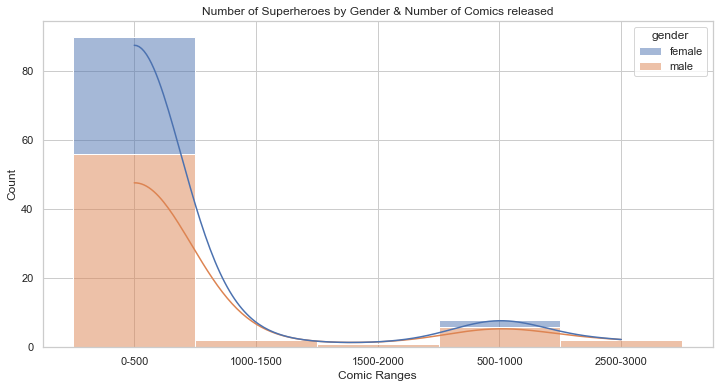

In [80]:
figure_35 = sns.histplot(data=range_comics_two, x= "Comic Ranges", hue="gender", multiple="stack",kde=True)
plt.title("Number of Superheroes by Gender & Number of Comics released");
figure_35.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_35.jpg", dpi=1000)

## Chart 36 - Number of Superheroes by Super Power & Number of Comics released

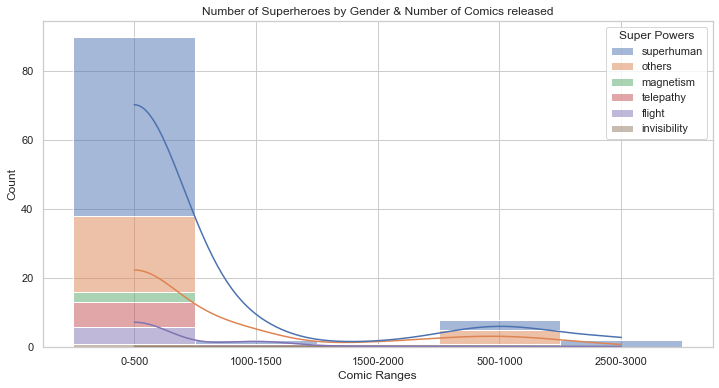

In [81]:
figure_36 = sns.histplot(data=range_comics_two, x= "Comic Ranges", hue="Super Powers", multiple="stack",kde=True)
plt.title("Number of Superheroes by Gender & Number of Comics released");
figure_36.figure.savefig("/Users/Marc/Desktop/Labs/Project 2/images/figure_36.jpg", dpi=1000)

# Summary

## Let's see if the hypotheses are True or False:

1) Comics and series have roughly the same amount of projects within each of them - <font color='red'>FALSE</font> (Comics have way more!)

2) Superhuman powers represent the 70% of all the different superpowers - <font color='red'>FALSE</font> (It is the one representing the biggest chunk, but it's 56.3%)

3) The top 5 superheroes by number of comics are all men - <font color='green'>TRUE</font>

4) The proportion of comics, series, stories and events is similar regardless of gender - <font color='green'>TRUE</font>. However, the number of projects done for superhero men is way larger than for superhero women.